In [ ]:
!pip install lxml

# !pip install --upgrade scikit-learn
# !pip install matplotlib==3.1.3
# !pip install "pypeit[pyqt5,bottleneck]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# please upgrade scikit-learn before running this notebook :)
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.impute import SimpleImputer,MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import TSNE

from sklearn import datasets
from matplotlib import offsetbox

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn import set_config
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import svm
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import scipy.stats as ss

import os
import warnings
import random

random.seed(2023)
seed = 2023

from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#@title Function for Confusion Matrix Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

# 1. Data Preparation

In [ ]:
path = "/content/drive/MyDrive/epam/data/LargeMovieReviewDataset.csv"
data = pd.read_csv(path, sep=",")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

           Total  Percent
review         0      0.0
sentiment      0      0.0


The data has no missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Here I will seperate 5000 data points from the big dataset of 50000, for the initial analysis and hyperparameter tunning. In the end I will test the final models with the full data to see the models full capacity.

In [ ]:
data_big = data.copy()

In [ ]:
y = data["sentiment"]
X = data.drop(["sentiment"], axis=1)

X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.2,
                                                    shuffle=True, stratify=y)
X_train_big.reset_index(inplace=True, drop=True)
y_train_big.reset_index(inplace=True, drop=True)

In [ ]:
X_train_big.shape

(40000, 1)

In [ ]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_train_big, y_train_big, random_state=seed,
                                                    test_size = 0.875,
                                                    shuffle=True, stratify=y_train_big)
X_train_big.reset_index(inplace=True, drop=True)
y_train_big.reset_index(inplace=True, drop=True)

In [ ]:
data = pd.concat([X_train_small, y_train_small], axis=1)

In [ ]:
data.shape

(5000, 2)

# 2. Data Preprocessing

## 2.1 Cleaning, Tokenization & Normaliztion

### Cleaning

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "lxml") # "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub(f'\[[^]]*\]-_,"{'}', ' ', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    lowercase_text = text.lower()
    return lowercase_text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [ ]:
data.head(10)

,review,sentiment
3106,now maybe it had something to do with the fact...,positive
23748,"in his descriptions of caa, platinum card lunc...",positive
9780,trailers of this movie may show scenes of viol...,positive
28970,i'm usually not inclined to write reviews abou...,negative
33486,there are many distinct problems with the movi...,negative
20985,dig! i would say to anyone even if you don't l...,positive
8376,it might have been a good movie if it had expl...,negative
2726,i loved this show. such talent; and i am so di...,positive
6519,"this is one of my favorite series, all categor...",positive
39283,"it's ""the f.b.i."" starring reed hadley, with a...",negative


In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [ ]:
data

,review,sentiment
3106,now maybe it had something to do with the fact...,positive
23748,in his descriptions of caa platinum card lunch...,positive
9780,trailers of this movie may show scenes of viol...,positive
28970,im usually not inclined to write reviews about...,negative
33486,there are many distinct problems with the movi...,negative
...,...,...
13148,those who know who know the kelly legend are ...,positive
8930,i gave timecop a perfect 10 i gave this 1its s...,negative
27340,i had lost faith in sooraj r barjatya after th...,positive
18099,okay i guess im pretty much a fan of spindled ...,negative


### Stemming

In [ ]:
data_st = data.copy()

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data_st['review']=data_st['review'].apply(simple_stemmer)

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
data_st['review']=data_st['review'].apply(remove_stopwords)

In [ ]:
data_st

,review,sentiment
3106,mayb someth fact saw thi movi low point life w...,positive
23748,hi descript caa platinum card lunch hollywood ...,positive
9780,trailer thi movi may show scene violenc non ma...,positive
28970,im usual inclin write review film dont think d...,negative
33486,mani distinct problem movi killshot one way ma...,negative
...,...,...
13148,know know kelli legend hope thi film would acc...,positive
8930,gave timecop perfect 10 gave thi 1it stori ver...,negative
27340,lost faith sooraj r barjatya movi main prem ki...,positive
18099,okay guess im pretti much fan spindl mutil des...,negative


### Lemmatization

In [ ]:
data_lm = data.copy()

In [ ]:
def lemmatize(tokens: list) -> list:
    # 1. Lemmatize
    tokens = list(map(lemmatizer.lemmatize, tokens))
    lemmatized_tokens = list(map(lambda x: lemmatizer.lemmatize(x, "v"), tokens))
    # 2. Remove stop words
    meaningful_words = list(filter(lambda x: not x in stop_words, lemmatized_tokens))
    # 3. Join the words back into one string separated by space
    text= ' '.join(meaningful_words)
    return text


def preprocess(review: str, total: int, show_progress: bool = True) -> list:
    if show_progress:
        global counter
        counter += 1
        print('Processing... %6i/%6i'% (counter, total), end='\r')
    # 1. Split into individual words
    tokens = word_tokenize(review)
    # 2. Lemmatize
    lemmas = lemmatize(tokens)
    return lemmas

In [ ]:
counter = 0
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
data_lm = np.array(list(map(lambda x: preprocess(x, len(data_lm.review)), data_lm.review)))
counter = 0

In [ ]:
data_lm = pd.DataFrame(data_lm,
                          columns = ["review"])
data_lm

,review
0,maybe something fact saw movie low point life ...
1,description caa platinum card lunch hollywood ...
2,trailer movie may show scene violence non main...
3,im usually incline write review film dont thin...
4,many distinct problem movie killshot one way m...
...,...
4995,know know kelly legend hop film would accurate...
4996,give timecop perfect 10 give 1its story bore h...
4997,lose faith sooraj r barjatya movie main prem k...
4998,okay guess im pretty much fan spindled mutilat...


## 2.2 Separation of Test from the Dataset

In [ ]:
y = data_st["sentiment"]
X = data_st.drop(["sentiment"], axis=1)

X_train_st, X_test_st, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.25,
                                                    shuffle=True, stratify=y)
X_train_st.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

In [ ]:
y = data["sentiment"]
X = data_lm

X_train_lm, X_test_lm, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.25,
                                                    shuffle=True, stratify=y)
X_train_lm.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

## 2.3 Vectorization

I will use CountVectorizer for the stammed data and TfidfVectorizer for the lemmatized data. Later in the models we will use the one that gives better results.

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0.001,max_df=0.999,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_X_train_st = cv.fit_transform(X_train_st.review)
cv_X_train_st = pd.DataFrame(cv_X_train_st.toarray(),
                          columns = cv.get_feature_names_out())
#transformed test reviews
cv_X_test_st = cv.transform(X_test_st.review)
cv_X_test_st = pd.DataFrame(cv_X_test_st.toarray(),
                          columns = cv.get_feature_names_out())


print('BOW_cv_train:',cv_X_train_st.shape)
print('BOW_cv_test:',cv_X_test_st.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (3750, 21056)
BOW_cv_test: (1250, 21056)


In [ ]:
cv_X_train_st

,007,010,05,10,10 10,10 15,10 becaus,10 film,10 gave,10 minut,...,zeta,zeta jone,zip,zombi,zombi film,zombi flick,zombi movi,zombi wa,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0.001,max_df=0.999,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_X_train_lm = tv.fit_transform(X_train_lm.review)
tv_X_train_lm = pd.DataFrame(tv_X_train_lm.toarray(),
                          columns = tv.get_feature_names_out())
#transformed test reviews
tv_X_test_lm =tv.transform(X_test_lm.review)
tv_X_test_lm = pd.DataFrame(tv_X_test_lm.toarray(),
                          columns = tv.get_feature_names_out())

print('Tfidf_train:',tv_X_train_lm.shape)
print('Tfidf_test:',tv_X_test_lm.shape)

Tfidf_train: (3750, 19726)
Tfidf_test: (1250, 19726)


# 3. EDA

## 3.1 Statistics

In [ ]:
y_train.value_counts()

positive    1875
negative    1875
Name: sentiment, dtype: int64

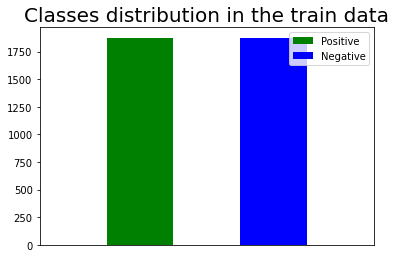

In [ ]:
plt.hist(y_train[y_train == "positive"],
         bins=2, color='green', label='Positive')
plt.hist(y_train[y_train == "negative"],
         bins=2, color='blue', label='Negative')
plt.title('Classes distribution in the train data', fontsize=20)
plt.xticks([])
plt.xlim(-0.5, 2)
plt.legend()
plt.show()

We have exactly equal amount of positive and negative sentiments. Thus we have no issue of imbalanced data.

In [ ]:
data_lm_hist = data_lm.copy()

In [ ]:
data_lm_hist["review"] = data_lm_hist["review"].apply(tokenizer.tokenize)

In [ ]:
data_lm_hist

,review
0,"[maybe, something, fact, saw, movie, low, poin..."
1,"[description, caa, platinum, card, lunch, holl..."
2,"[trailer, movie, may, show, scene, violence, n..."
3,"[im, usually, incline, write, review, film, do..."
4,"[many, distinct, problem, movie, killshot, one..."
...,...
4995,"[know, know, kelly, legend, hop, film, would, ..."
4996,"[give, timecop, perfect, 10, give, 1its, story..."
4997,"[lose, faith, sooraj, r, barjatya, movie, main..."
4998,"[okay, guess, im, pretty, much, fan, spindled,..."


In [ ]:
y = data["sentiment"]
X = data_lm_hist

X_train_lm_hist, X_test_lm_hist, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.25,
                                                    shuffle=True, stratify=y)
X_train_lm_hist.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

In [ ]:
X_train_lm_hist = pd.concat([X_train_lm_hist, y_train], axis=1)
X_train_lm_hist

,review,sentiment
0,"[steve, carell, star, person, relate, tosort, ...",positive
1,"[agonize, comedydrama, get, surprisingly, ster...",negative
2,"[watch, movie, try, figure, bother, make, thou...",negative
3,"[green, butcher, anders, thomas, jensen, denma...",positive
4,"[really, like, movie, watch, last, night, publ...",positive
...,...,...
3745,"[love, movie, trailer, circulate, internet, ye...",positive
3746,"[movie, simply, one, best, movie, privilage, t...",positive
3747,"[love, movie, know, people, might, say, wa, gr...",positive
3748,"[id, love, see, tiein, nightbreed, fury, xmen,...",positive


In [ ]:
X_train_lm_hist_pos = X_train_lm_hist[X_train_lm_hist["sentiment"] == "positive"]
X_train_lm_hist_neg = X_train_lm_hist[X_train_lm_hist["sentiment"] == "negative"]
print(X_train_lm_hist_pos.shape)
print(X_train_lm_hist_neg.shape)

(1875, 2)
(1875, 2)


In [ ]:
X_train_lm_hist_pos['review_lenght'] = np.array(list(map(len, X_train_lm_hist_pos['review'])))
median_pos = X_train_lm_hist_pos['review_lenght'].median()
mean_pos = X_train_lm_hist_pos['review_lenght'].mean()
mode_pos = X_train_lm_hist_pos['review_lenght'].mode()[0]
X_train_lm_hist_neg['review_lenght'] = np.array(list(map(len, X_train_lm_hist_neg['review'])))
median_neg = X_train_lm_hist_neg['review_lenght'].median()
mean_neg = X_train_lm_hist_neg['review_lenght'].mean()
mode_neg = X_train_lm_hist_neg['review_lenght'].mode()[0]

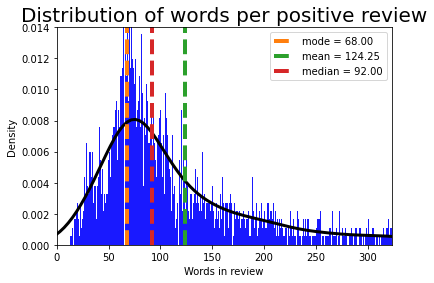

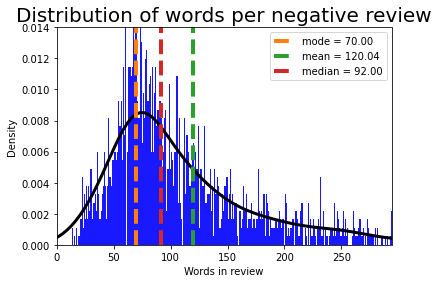

In [ ]:
fig, ax = plt.subplots()
sns.distplot(X_train_lm_hist_pos['review_lenght'], bins=X_train_lm_hist_pos['review_lenght'].max(),
            hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
            kde_kws={"color": "black", 'linewidth': 3})
ax.set_xlim(left=0, right=np.percentile(X_train_lm_hist_pos['review_lenght'], 95))
ax.set_xlabel('Words in review')
ymax = 0.014
plt.ylim(0, ymax)
ax.plot([mode_pos, mode_pos], [0, ymax], '--', label=f'mode = {mode_pos:.2f}', linewidth=4)
ax.plot([mean_pos, mean_pos], [0, ymax], '--', label=f'mean = {mean_pos:.2f}', linewidth=4)
ax.plot([median_pos, median_pos], [0, ymax], '--',
        label=f'median = {median_pos:.2f}', linewidth=4)
ax.set_title('Distribution of words per positive review', fontsize=20)
plt.legend()
plt.show()
fig, ax = plt.subplots()
sns.distplot(X_train_lm_hist_neg['review_lenght'], bins=X_train_lm_hist_neg['review_lenght'].max(),
            hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
            kde_kws={"color": "black", 'linewidth': 3})
ax.set_xlim(left=0, right=np.percentile(X_train_lm_hist_neg['review_lenght'], 95))
ax.set_xlabel('Words in review')
ymax = 0.014
plt.ylim(0, ymax)
ax.plot([mode_neg, mode_neg], [0, ymax], '--', label=f'mode = {mode_neg:.2f}', linewidth=4)
ax.plot([mean_neg, mean_neg], [0, ymax], '--', label=f'mean = {mean_neg:.2f}', linewidth=4)
ax.plot([median_neg, median_neg], [0, ymax], '--',
        label=f'median = {median_neg:.2f}', linewidth=4)
ax.set_title('Distribution of words per negative review', fontsize=20)
plt.legend()
plt.show()

We can see that on average the reviews have length of 120 words. And the average length is almost the same for both sentiments.

## 3.2 Visualizations

### Word frequencies in positive reviews

In [ ]:
data_lm_freq = data_lm.copy()

In [ ]:
y = data["sentiment"]
X = data_lm_freq

X_train_lm_freq, X_test_lm, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.25,
                                                    shuffle=True, stratify=y)

X_train_lm_freq.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

In [ ]:
X_train_lm_freq = pd.concat([X_train_lm_freq, y_train], axis=1)
X_train_lm_freq

,review,sentiment
0,steve carell star person relate tosort dan rea...,positive
1,agonize comedydrama get surprisingly sterling ...,negative
2,watch movie try figure bother make though main...,negative
3,green butcher anders thomas jensen denmark 200...,positive
4,really like movie watch last night public broa...,positive
...,...,...
3745,love movie trailer circulate internet year hit...,positive
3746,movie simply one best movie privilage take yea...,positive
3747,love movie know people might say wa great movi...,positive
3748,id love see tiein nightbreed fury xmen series ...,positive


Here I will collect all the positive and negative texts together to understand general frequencies of the words for different sentiments.

In [ ]:
positive_text = ""
negative_text = ""
for i in range(X_train_lm_freq["review"].shape[0]):
  if X_train_lm_freq["sentiment"][i] == "positive":
    positive_text += " " + X_train_lm_freq["review"][i]
  else:
    negative_text += " " + X_train_lm_freq["review"][i]
print(len(positive_text))
print(len(negative_text))

1548282
1470199


<function matplotlib.pyplot.show(*args, **kw)>

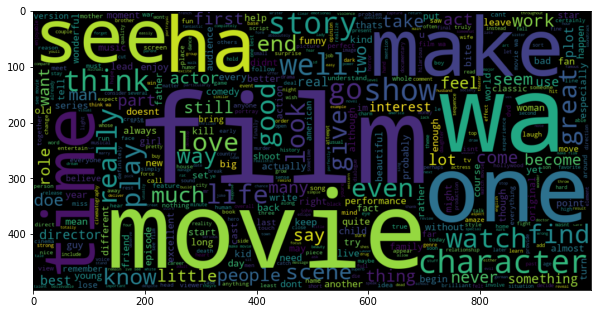

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=positive_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

### Word frequencies in negative reviews

<function matplotlib.pyplot.show(*args, **kw)>

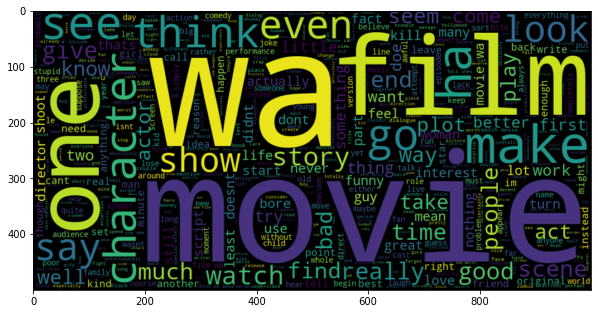

In [ ]:
#word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=negative_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

We can see that many of the frequent words are the same for both negative and positive reviews, so may be it will be hard for the models to classify the sentiment.

# 4. Basic Model

## 4.1 Naive Bayes Classifier + Stamming + CountV

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf =  MultinomialNB()

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=cv_X_train_st, y=y_train, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

              precision    recall  f1-score   support

    negative       0.84      0.84      0.84      1875
    positive       0.84      0.84      0.84      1875

    accuracy                           0.84      3750
   macro avg       0.84      0.84      0.84      3750
weighted avg       0.84      0.84      0.84      3750



## 4.2 Naive Bayes Classifier + Lemmatization + TfidfV

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf =  MultinomialNB()

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=tv_X_train_lm, y=y_train, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

              precision    recall  f1-score   support

    negative       0.85      0.84      0.85      1875
    positive       0.84      0.85      0.85      1875

    accuracy                           0.85      3750
   macro avg       0.85      0.85      0.85      3750
weighted avg       0.85      0.85      0.85      3750



The Lemmatization + TfidfV preprocessed reviews seem to convey very little but more information. Thus further I will use that data in the analysis.

# 5. Hyperparameter tuning

## 5.1 Naive Bayes

In [ ]:
grid = {"alpha": [0, 1]}

mnb = MultinomialNB()
gs = GridSearchCV(mnb,
                  param_grid = grid,
                  scoring='accuracy',
                  cv=5)

In [ ]:
gs.fit(tv_X_train_lm, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), param_grid={'alpha': [0, 1]},
             scoring='accuracy')

In [ ]:
mnb_bp = gs.best_params_
mnb_bp

{'alpha': 1}

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = MultinomialNB(**gs.best_params_)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=tv_X_train_lm, y=y_train, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

              precision    recall  f1-score   support

    negative       0.85      0.84      0.85      1875
    positive       0.84      0.85      0.85      1875

    accuracy                           0.85      3750
   macro avg       0.85      0.85      0.85      3750
weighted avg       0.85      0.85      0.85      3750



## 5.2 SGD Classifier

In [ ]:
grid = {"alpha": (0.00001, 0.000001),
        "penalty": ("l1", "l2", "elasticnet"),
        "max_iter": (10, 100)}

sgd = SGDClassifier(random_state=seed)
gs = GridSearchCV(sgd,
                  param_grid = grid,
                  scoring='accuracy',
                  cv=5)

In [ ]:
gs.fit(tv_X_train_lm[:100], y_train[:100])

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=2023),
             param_grid={'alpha': (1e-05, 1e-06), 'max_iter': (10, 100),
                         'penalty': ('l1', 'l2', 'elasticnet')},
             scoring='accuracy')

In [ ]:
sgd_bp = gs.best_params_
sgd_bp

{'alpha': 1e-05, 'max_iter': 10, 'penalty': 'l1'}

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = SGDClassifier(**gs.best_params_, random_state=seed)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=tv_X_train_lm, y=y_train, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

              precision    recall  f1-score   support

    negative       0.86      0.83      0.85      1875
    positive       0.83      0.87      0.85      1875

    accuracy                           0.85      3750
   macro avg       0.85      0.85      0.85      3750
weighted avg       0.85      0.85      0.85      3750



## 5.3 SVM

In [ ]:
grid = {"gamma": [0.1, 1.0, 10],
        "C": [0.1, 1.0, 10],
        "kernel": ['rbf','linear']}

svm = svm.SVC(random_state=seed)
gs = GridSearchCV(svm,
                  param_grid = grid,
                  scoring='accuracy',
                  cv=5)

In [ ]:
gs.fit(tv_X_train_lm[:100], y_train[:100])

GridSearchCV(cv=5, estimator=SVC(random_state=2023),
             param_grid={'C': [0.1, 1.0, 10], 'gamma': [0.1, 1.0, 10],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [ ]:
svm_bp = gs.best_params_
svm_bp

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = SVC(**gs.best_params_, random_state=seed)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=tv_X_train_lm[:100], y=y_train[:100], cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

              precision    recall  f1-score   support

    negative       0.66      0.83      0.73        53
    positive       0.73      0.51      0.60        47

    accuracy                           0.68       100
   macro avg       0.69      0.67      0.67       100
weighted avg       0.69      0.68      0.67       100



Only tried on very small data 100 examples, as otherwise it takes too long. Thus will not use SVM as final model as well. Though the results are quite good for 100 examples.

## 5.4 LR Classifier

In [ ]:
grid = {"penalty": ["l1", "l2"],
        "solver": ["liblinear", "saga"]}

logreg = LogisticRegression(random_state=seed)
gs = GridSearchCV(logreg,
                  param_grid = grid,
                  scoring='accuracy',
                  cv=5)

In [ ]:
gs.fit(tv_X_train_lm, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2023),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
lr_bp = gs.best_params_
lr_bp

{'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = LogisticRegression(**gs.best_params_, random_state=seed)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=tv_X_train_lm, y=y_train, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1875
    positive       0.84      0.88      0.86      1875

    accuracy                           0.85      3750
   macro avg       0.85      0.85      0.85      3750
weighted avg       0.85      0.85      0.85      3750



## 5.5 GB Classifier

In [ ]:
grid = {"loss": ["log_loss", "deviance", "exponential"],
        "max_depth": np.arange(2, 6, 1),
        "criterion": ["friedman_mse", "squared_error"]}

gbr = GradientBoostingClassifier(random_state=seed)
gs = GridSearchCV(gbr,
                  param_grid = grid,
                  scoring='accuracy',
                  cv=5)

In [ ]:
gs.fit(tv_X_train_lm[:100], y_train[:100])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=2023),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': array([2, 3, 4, 5])},
             scoring='accuracy')

In [ ]:
gb_bp = gs.best_params_
gb_bp

{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_depth': 5}

In [ ]:
# Variables for average classification report
originalclass_lr = []
predictedclass_lr = []

#Make our custom score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass_lr.extend(y_true)
    predictedclass_lr.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

clf = GradientBoostingClassifier(**gs.best_params_, random_state=seed)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=tv_X_train_lm[:100], y=y_train[:100], cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass_lr, predictedclass_lr))

              precision    recall  f1-score   support

    negative       0.58      0.68      0.63        53
    positive       0.55      0.45      0.49        47

    accuracy                           0.57       100
   macro avg       0.57      0.56      0.56       100
weighted avg       0.57      0.57      0.56       100



Only tried on very small data 100 examples, as otherwise it overloads the colab. Thus will not use GB Classifier as final model as well.

From the given models the best results belong to Multinomial Naive Bayes and Logistic Regression. So in the final part of the analysis, I will test those 2 models with their best hyperparameters on the full dataset and will check the results on the yet unseen test set.

# 6. Word importances

## 6.1 LR weights

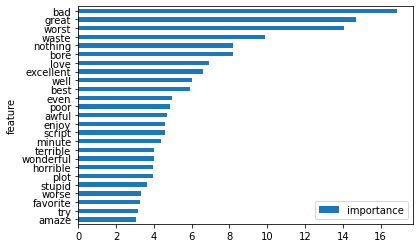

In [ ]:
model = LogisticRegression(
    penalty="l2",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
    random_state=seed)
model.fit(tv_X_train_lm, y_train)
w = list(model.coef_[0])
features = tv_X_train_lm.columns
feature_importance = pd.DataFrame(features, columns = ["feature"])
feature_importance["importance"] = list(map(lambda x:pow(x,2),w))# I used square weights to have all of them on the positive side
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
feature_importance_new = feature_importance[-25:]

ax = feature_importance_new.plot.barh(x="feature", y="importance")
plt.show()

## 6.2 Random forest

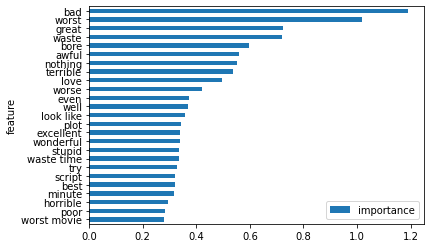

In [ ]:
model = RandomForestClassifier()

model.fit(tv_X_train_lm, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

# fig, ax = plt.subplots()
# ax.barh(range(len(importances)), importances[indices])
# ax.set_yticks(range(len(importances)))
# _ = ax.set_yticklabels(np.array(tv_X_train_lm.columns)[indices])
importances = model.feature_importances_
feature_importance = pd.DataFrame(tv_X_train_lm.columns, columns = ["feature"])
feature_importance["importance"] = list(map(lambda x:x*100,importances))# I used square weights to have all of them on the positive side
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
feature_importance_new = feature_importance[-25:]

ax = feature_importance_new.plot.barh(x="feature", y="importance")
plt.show()

We can clearly see that the most important words that are decisive for the prediction are the words that convey emotions. For example in the most important words are "bad", "waste", "great", "bore" and "love". That is a very interesting result.

# 7. Results

In [ ]:
data_big['review']=data_big['review'].apply(denoise_text)
data_big['review']=data_big['review'].apply(remove_special_characters)
data_big_lm = data_big.copy()
counter = 0
# REPLACE_WITH_SPACE = re.compile(r'[^A-Za-z\s]')
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
data_big_lm = np.array(list(map(lambda x: preprocess(x, len(data_big_lm.review)), data_big_lm.review)))
counter = 0
data_big_lm = pd.DataFrame(data_big_lm,
                          columns = ["review"])
data_big_lm
y = data_big["sentiment"]
X = data_big_lm

X_train_lm, X_test_lm, y_train, y_test = train_test_split(X, y, random_state=seed,
                                                    test_size = 0.2,
                                                    shuffle=True, stratify=y)
X_train_lm.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0.001,max_df=0.999,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_X_train_lm = tv.fit_transform(X_train_lm.review)
tv_X_train_lm = pd.DataFrame(tv_X_train_lm.toarray(),
                          columns = tv.get_feature_names_out())
#transformed test reviews
tv_X_test_lm =tv.transform(X_test_lm.review)
tv_X_test_lm = pd.DataFrame(tv_X_test_lm.toarray(),
                          columns = tv.get_feature_names_out())

print('Tfidf_train:',tv_X_train_lm.shape)
print('Tfidf_test:',tv_X_test_lm.shape)

Tfidf_train: (40000, 16146)
Tfidf_test: (10000, 16146)


## 7.1 Naive Bayes

              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      5000
    positive       0.87      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

                         Confusion Matrix


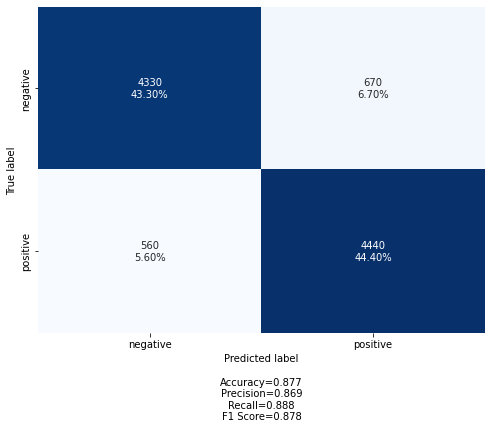

In [ ]:
clf = MultinomialNB(**mnb_bp)
clf.fit(tv_X_train_lm, y_train)
originalclass_lr = y_test
predictedclass_lr = clf.predict(tv_X_test_lm)
print(classification_report(originalclass_lr, predictedclass_lr))
print(25*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["negative", "positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.944


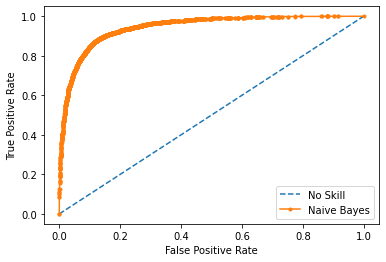

In [ ]:
# generate a no skill prediction (majority class)
y_test_num = [1 if x == "positive" else 0 for x in y_test]
ns_probs = [0 for _ in range(len(y_test_num))]
# fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(trainX, trainy)
# predict probabilities
lr_probs = clf.predict_proba(tv_X_test_lm)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_num, ns_probs)
lr_auc = roc_auc_score(y_test_num, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_num, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_num, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 7.2 LR Classifier

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

                         Confusion Matrix


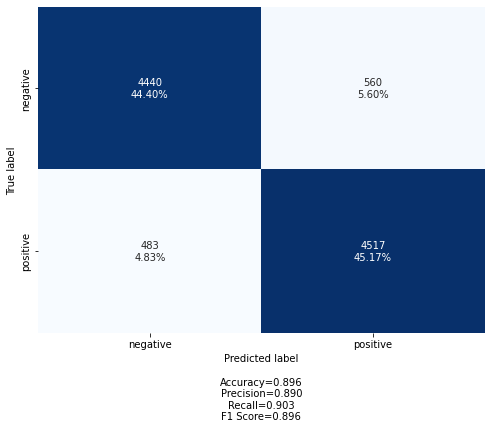

In [ ]:
clf = LogisticRegression(**lr_bp, random_state=seed)
clf.fit(tv_X_train_lm, y_train)
originalclass_lr = y_test
predictedclass_lr = clf.predict(tv_X_test_lm)
print(classification_report(originalclass_lr, predictedclass_lr))
print(25*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["negative", "positive"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.962


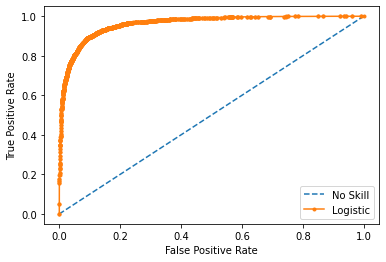

In [ ]:
# generate a no skill prediction (majority class)
y_test_num = [1 if x == "positive" else 0 for x in y_test]
ns_probs = [0 for _ in range(len(y_test_num))]
# fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(trainX, trainy)
# predict probabilities
lr_probs = clf.predict_proba(tv_X_test_lm)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_num, ns_probs)
lr_auc = roc_auc_score(y_test_num, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_num, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_num, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Both of the models have demonstrated quite good results. Logistic Regression was a bit more accurate also all the metrics were by very little but better than the Naive Bayes model. Thus I would choose the LR Classifier for this problem.